# Experiment 1: Naive Face Matching

In [8]:
import torch

from torchvision import transforms
import matplotlib.pyplot as plt

from scipy import spatial

from face_alignment import align


In [9]:
model_face_embedding = torch.hub.load('otroshi/edgeface', 'edgeface_s_gamma_05', source='github', pretrained=True)
model_face_embedding.eval()


Using cache found in /root/.cache/torch/hub/otroshi_edgeface_main


TimmFRWrapperV2(
  (model): EdgeNeXt(
    (stem): Sequential(
      (0): Conv2d(3, 48, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((48,), eps=1e-06, elementwise_affine=True)
    )
    (stages): Sequential(
      (0): EdgeNeXtStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): ConvBlock(
            (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48)
            (norm): LayerNorm((48,), eps=1e-06, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): LoRaLin(
                (linear1): Linear(in_features=48, out_features=24, bias=False)
                (linear2): Linear(in_features=24, out_features=192, bias=True)
              )
              (act): GELU(approximate='none')
              (drop1): Dropout(p=0.0, inplace=False)
              (norm): Identity()
              (fc2): LoRaLin(
                (linear1): Linear(in_features=192, out_features=24, bias=False)
                (linea

In [10]:
# Define preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])


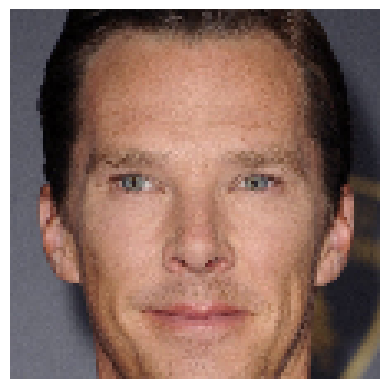

In [11]:
path = "test_images/benedict cumberbatch_1.jpg"
aligned = align.get_aligned_face(path) # align face
transformed_input = transform(aligned).unsqueeze(0) # preprocessing

# Plot Image
plt.imshow(aligned)
plt.axis("off")  # Hide axis
plt.show()

# extract embedding
face_1_embedding = model_face_embedding(transformed_input)


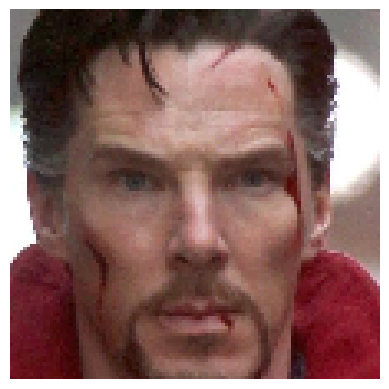

In [12]:
path = "test_images/benedict cumberbatch_2.jpg"
aligned = align.get_aligned_face(path) # align face
transformed_input = transform(aligned).unsqueeze(0) # preprocessing

# Plot Image
plt.imshow(aligned)
plt.axis("off")  # Hide axis
plt.show()

# extract embedding
face_2_embedding = model_face_embedding(transformed_input)


In [13]:
result = 1 - spatial.distance.cosine(face_1_embedding.flatten().detach().numpy(), face_2_embedding.flatten().detach().numpy())
print('Cosine Similarity: {}'.format(result))


Cosine Similarity: 0.6821838468171282
